This notebook contains the code for pre-processing the texts corresponding to interventions in the Spanish State Parliament. The pre-processing consists of:

1. Removal of \n, \t, \r.
2. Removal of punctuation.
2. Removal of digits, spaces and words with two letters or fewer.
3. Removing a list of spanish stopwords.
4. Removing procedural words: señor/a, diputado/a, señoría, President/a, etc.
5. Tokenizing.
6. Lemmatizing.

Additionally, we remove people that are not MPs and group the data by:

1. Individual & Legislature.
2. Political Group & Legislature.
3. ...

In [12]:
'''
$python -m spacy download es_core_news_sm
'''

'\n$python -m spacy download es_core_news_sm\n'

In [79]:
import pandas as pd
import nltk
from gensim.utils import tokenize
import string
from nltk.tokenize import ToktokTokenizer
import spacy
from nltk.stem import WordNetLemmatizer

iglesias


In [82]:
tok = ToktokTokenizer()
ltz = spacy.load('es_core_news_sm')

def clean(text: str, lemmatise: bool = False) -> list:
    # Removing \n, \t, \r.
    text = text.replace('\t', ' ').replace('\n', ' ').replace('\r', ' ')

    # Text to lowercase.
    text = text.lower()

    # Removing punctuation.
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

    # Double spaces.
    text = text.replace('  ', ' ')

    # Turning splitted words into 1, e.g. con-\ngreso to congreso.
    regex = r"([a-zA-ZñáéíóúüàèìòùçÑÁÉÍÓÚÜÀÈÌÒÙÇ])(\-\n)"
    text = re.sub(regex, '\1', text)

    # Removing en- and em-dashes, '«' and '»'.
    chars = ['-', '–', '-', '—', '«', '»']
    for c in chars:
        text = text.replace(c, '')

    # Tokenizing.
    tokens = tok.tokenize(text)

    # Turning words that split in two into one. (e.g. ['presi-', 'dente'])
    for i in range(len(tokens)):
        if '\xad' in tokens[i]:
            tokens[i] = tokens[i].replace('\xad', '')
            if len(tokens) > i + 1:
                tokens[i] = tokens[i] + tokens[i+1]
                tokens[i+1] = ''

    tokens = [t for t in tokens if t != '']

    # Stopwords + procedural words from the Spanish Parliament.
    stopwords = nltk.corpus.stopwords.words('spanish')

    procedural = ['diputado', 'diputada', 'diputados', 'diputadas', 'gobierno', 'gobiernos', 'oposición', 'exministro', 'ministro',
                'ministra', 'ministros', 'ministras', 'parlamento', 'parlamentario', 'congreso', 'pregunta', 'preguntar', 'ley',
                'leyes', 'decreto', 'decreto-ley', 'partido', 'partidos', 'grupo', 'señoras', 'señor', 'señora', 'señores', 'señoría',
                'señorías', 'voto', 'votar', 'decoro', 'cámara', 'presidente', 'presidenta', 'vicepresidente', 'vicepresidenta',
                'vicepresidentes', 'vicepresidentas', 'proposición', 'proposiciones', 'proyecto', 'no-ley', 'favor', 'gracias',
                'enmienda', 'enmiendas', 'moción', 'mociones', 'interpelación', 'interpelaciones', 'aplausos', 'usted', 'ustedes',
                'portavoz', 'portavoces', 'alusión', 'alusiones', 'comisión', 'comisiones', 'presupuesto', 'presupuestos', 'medida',
                'medidas', 'política', 'políticas', 'propuesta', 'propuestas', 'tribuna', 'pnl', 'regulación', 'herria', 'junts', 
                'disposición', 'disposiciones']

    other_stopwords = ['socialista', 'socialistas', 'popular', 'populares', 'ciudadanos', 'podemos', 'moitas', 'grazas', 'obrigado',
                    'egun', 'eskerrik', 'asko', 'moltes', 'gràcies', 'bon', 'día', 'buenos', 'días', 'ahora', 'además', 'aquí', 'allí',
                    'solo', 'sólo', 'sino', 'hoy', 'así', 'ejemplo', 'tan', 'senyor', 'senyora', 'toda', 'hecho', 'hacer', 'esquerra' 
                    'bildu', 'pnv', 'psoe', 'pp', 'vox', 'hace', 'decir', 'dice', 'dijo', 'dicho', 'boas', 'tardes', 'bona', 'tarda', 
                    'arratsalde', 'buenas', 'ciu', 'erc', 'iu', 'haber']
    
    with open('../spanish.txt') as f:
        words = f.readlines()

    stopwords = stopwords + procedural + other_stopwords + words

    # Lemmatisation: first joining sentences and then lemmatising (the module splits it automatically).
    if lemmatise:
    
        text = ' '.join(tokens)

        doc = ltz(text)
        lemmas = [ltz.lemma_ for ltz in doc]

        # Removing stop words, procedural words, short words and numbers.
        tokens = [w for w in lemmas if w not in stopwords and len(w) > 2 and w != ' ' and not w.isdigit()]

    else:
        tokens = [w for w in tokens if w not in stopwords and len(w) > 2 and w != ' ' and not w.isdigit()]

    return tokens

In [81]:
data = pd.read_csv('../data/final/leg-7-to-14-with-parsed-texts.csv').dropna().reset_index(drop=True)
corpus = data['text'].to_list()

In [83]:
cleaned_corpus = [clean(t) for t in corpus]

In [84]:
total_len = 0
for t in cleaned_corpus:
    total_len += len(t)
total_len

29704507

In [86]:
cleaned_corpus[0]

['buena',
 'tarde',
 'cuarenta',
 'año',
 'atrás',
 'celebrar',
 'primero',
 'debate',
 'investidura',
 'presente',
 'bien',
 'nacer',
 'ser',
 'caso',
 'niño',
 'guardir',
 'recuerdo',
 'instante',
 'político',
 'aquel',
 'tiempo',
 'todavía',
 'agujero',
 'bala',
 'techo',
 'hemiciclo',
 'aire',
 'lleno',
 'humo',
 'tabaco',
 'mayoría',
 'hombre',
 'querer',
 'llamado',
 'tener',
 'hacer él',
 'teléfono',
 'fijo',
 'pasar',
 'tiempo',
 'ritual',
 'democrático',
 'investidura',
 'reglado',
 'constitución',
 'continúar',
 'ser',
 'mismo',
 'jefe',
 'encargo',
 'candidato',
 'generalmente',
 'tener',
 'representar',
 'mayoría',
 'exponer',
 'programa',
 'solicite',
 'confianza',
 'mayoría',
 'formar',
 'ser',
 'pretendo',
 'próximo',
 'solicitar',
 'confianza',
 'apelar',
 'responsabilidad',
 'apelar',
 'generosidad',
 'apelar',
 'definitiva',
 'responsabilidad',
 'generosidad',
 'lograr',
 'españa',
 'tener',
 'sumar',
 'bloqueo',
 'españa',
 'cambiar',
 'cuatro',
 'década',
 'ser',
 '

In [87]:
data['clean_text'] = cleaned_corpus

In [88]:
data.head()

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,clean_text
0,13,2019-07-22,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Sánchez Pérez-Castejón, Pedro (GS)",https://www.congreso.es:443/public_oficiales/L...,PSOE,"Gracias, presidenta. Buenas tardes ya, señoría...","[buena, tarde, cuarenta, año, atrás, celebrar,..."
1,13,2019-07-22,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Rivera Díaz, Albert (GCs)",https://www.congreso.es:443/public_oficiales/L...,CS,"Puro teatro, señor Sánchez, puro teatro es lo ...","[puro, teatro, sánchez, puro, teatro, ser, lle..."
2,13,2019-07-22,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Iglesias Turrión, Pablo (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Gracias, señora presidenta. Quisiera, señoría,...","[quisiero, señoer, primero, palabra, tarde, se..."
3,13,2019-07-22,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Asens Llodrà, Jaume (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Señorías, buenas tardes, bona tarda. Es la pri...","[buena, tarde, ser, primero, vez, tomo, palabr..."
4,13,2019-07-22,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Garzón Espinosa, Alberto (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Muchas gracias, señora presidenta. Señor Sánch...","[gracia, sánchez, abril, gente, esperanza, dec..."


In [89]:
data.to_csv('../data/final/leg-7-to-14-with-clean-lemmatised-texts.csv', index=False)

In [90]:
GP = data.loc[data['political_group'] ==
              'UP']['clean_text'].to_list()
new = []
for l in GP:
    new.extend(l)

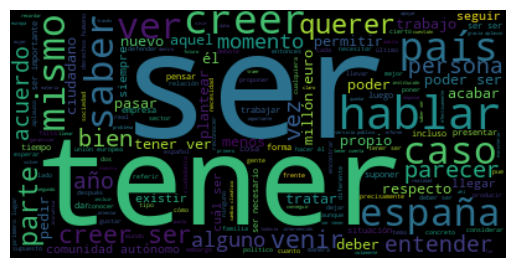

In [91]:
# Wordcloud.

# Start with loading all necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(new))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()